Found 1500 files belonging to 15 classes.
Using 1200 files for training.
Found 1500 files belonging to 15 classes.
Using 300 files for validation.
Epoch 1/15
75/75 [==============================] - 328s 4s/step - loss: 1.7184 - accuracy: 0.5658 - val_loss: 2.0535 - val_accuracy: 0.8167
Epoch 2/15
75/75 [==============================] - 102s 1s/step - loss: 0.7589 - accuracy: 0.8708 - val_loss: 1.4464 - val_accuracy: 0.9467
Epoch 3/15
75/75 [==============================] - 101s 1s/step - loss: 0.5811 - accuracy: 0.9200 - val_loss: 0.9539 - val_accuracy: 0.9667
Epoch 4/15
75/75 [==============================] - 103s 1s/step - loss: 0.5262 - accuracy: 0.9342 - val_loss: 0.6045 - val_accuracy: 0.9967
Epoch 5/15
75/75 [==============================] - 105s 1s/step - loss: 0.4549 - accuracy: 0.9458 - val_loss: 0.4327 - val_accuracy: 0.9867
Epoch 6/15
75/75 [==============================] - 125s 2s/step - loss: 0.4063 - accuracy: 0.9633 - val_loss: 0.3465 - val_accuracy: 0.9867
Epoch 7

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


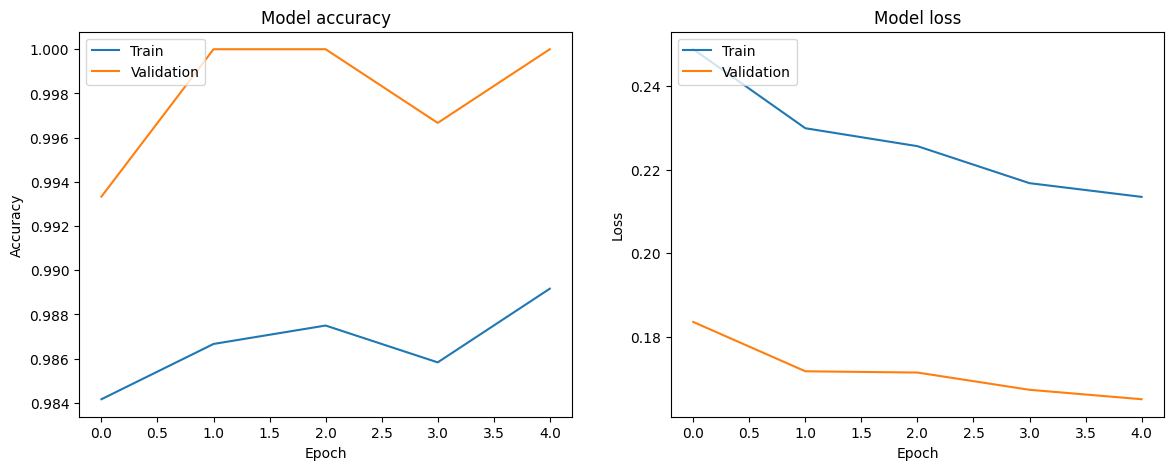

In [ ]:
# import os
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras import regularizers
# import matplotlib.pyplot as plt
# from keras.applications import EfficientNetV2L

# # Constants
# BATCH_SIZE = 32
# IMG_HEIGHT = 380
# IMG_WIDTH = 380
# DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/Dataset"

# # Data augmentation
# data_augmentation = keras.Sequential(
#     [
#         layers.RandomFlip("horizontal", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
#         layers.RandomRotation(0.1, fill_mode="reflect", interpolation="bilinear", fill_value=0.0),
#         layers.RandomZoom(0.1, fill_mode="reflect", interpolation="bilinear", fill_value=0.0),
#         layers.RandomContrast(0.2),
#         layers.RandomBrightness(0.2),
#         layers.RandomTranslation(0.1, 0.1, fill_mode="reflect", interpolation="bilinear", fill_value=0.0),
#         layers.RandomCrop(IMG_HEIGHT, IMG_WIDTH)
#     ]
# )

# # Preprocessing
# def preprocess(image, label, num_classes):
#     image = tf.map_fn(lambda img: tf.squeeze(data_augmentation(tf.expand_dims(img, 0)), axis=0), image)
#     label = tf.one_hot(label, num_classes)
#     return image, label

# # Model building
# def build_model(num_classes):
#     inputs = layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
#     model = EfficientNetV2L(include_top=False, input_tensor=inputs, weights="imagenet")

#     # Freeze the pretrained weights
#     model.trainable = False

#     # Rebuild top
#     x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
#     x = layers.BatchNormalization()(x)

#     top_dropout_rate = 0.2
#     x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
#     outputs = layers.Dense(num_classes, activation="softmax", name="pred", kernel_regularizer=regularizers.l2(0.01))(x)  # L2 regularization

#     # Compile
#     model = keras.Model(inputs, outputs, name="EfficientNet")
#     lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.9)
#     optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
#     model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
#     return model

# # Unfreeze model
# def unfreeze_model(model):
#     # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
#     for layer in model.layers[-20:]:
#         if not isinstance(layer, layers.BatchNormalization):
#             layer.trainable = True

#     optimizer = keras.optimizers.Adam(learning_rate=1e-5)
#     model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# # Load data
# def load_data():
#     train_ds = tf.keras.utils.image_dataset_from_directory(
#         DATA_DIR,
#         validation_split=0.2,
#         subset="training",
#         seed=123,
#         image_size=(IMG_HEIGHT, IMG_WIDTH),
#         batch_size=BATCH_SIZE)

#     val_ds = tf.keras.utils.image_dataset_from_directory(
#         DATA_DIR,
#         validation_split=0.2,
#         subset="validation",
#         seed=123,
#         image_size=(IMG_HEIGHT, IMG_WIDTH),
#         batch_size=BATCH_SIZE)

#     return train_ds, val_ds

# def main():
#     train_ds, val_ds = load_data()
#     class_names = train_ds.class_names
#     num_classes = len(class_names)

#     train_ds = train_ds.map(lambda x, y: preprocess(x, y, num_classes))
#     val_ds = val_ds.map(lambda x, y: preprocess(x, y, num_classes))

#     model = build_model(num_classes=num_classes)

#     # Create a callback for early stopping
#     early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#     epochs = 15

#     # Continue training
#     hist = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[early_stopping_callback])

#     unfreeze_model(model)

#     epochs = 5
#     hist = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[early_stopping_callback])

#     # Save the entire model as a single file
#     model.save('/content/drive/MyDrive/Colab Notebooks/EV2L_asl_ko.h5')

#     # Plot training & validation accuracy values
#     plt.figure(figsize=(14, 5))
#     plt.subplot(1, 2, 1)
#     plt.plot(hist.history['accuracy'])
#     plt.plot(hist.history['val_accuracy'])
#     plt.title('Model accuracy')
#     plt.ylabel('Accuracy')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Validation'], loc='upper left')

#     # Plot training & validation loss values
#     plt.subplot(1, 2, 2)
#     plt.plot(hist.history['loss'])
#     plt.plot(hist.history['val_loss'])
#     plt.title('Model loss')
#     plt.ylabel('Loss')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Validation'], loc='upper left')

#     plt.show()

# if __name__ == "__main__":
#     main()


In [20]:
# Cell 1: Import necessary libraries
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from keras.applications import EfficientNetV2L

In [21]:
# Cell 2: Define constants
BATCH_SIZE = 16
IMG_HEIGHT = 380
IMG_WIDTH = 380
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/Dataset_alpha"

In [22]:
# Cell 3: Define data augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.3),
        layers.RandomBrightness(0.4),
        layers.RandomTranslation(0.2, 0.2),
        layers.RandomCrop(IMG_HEIGHT, IMG_WIDTH)
    ]
)

In [23]:
# Cell 4: Load data
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

class_names = train_ds.class_names
num_classes = len(class_names)

Found 1500 files belonging to 15 classes.
Using 1200 files for training.
Found 1500 files belonging to 15 classes.
Using 300 files for validation.


In [24]:
# Cell 5: Preprocess data
train_ds = train_ds.map(lambda x, y: (tf.map_fn(lambda img: tf.squeeze(data_augmentation(tf.expand_dims(img, 0)), axis=0), x), tf.one_hot(y, num_classes)))
val_ds = val_ds.map(lambda x, y: (tf.map_fn(lambda img: tf.squeeze(data_augmentation(tf.expand_dims(img, 0)), axis=0), x), tf.one_hot(y, num_classes)))

In [25]:
# Cell 6: Build model
inputs = layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
model = EfficientNetV2L(include_top=False, input_tensor=inputs, weights="imagenet")

# Freeze the pretrained weights
model.trainable = False

# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(num_classes, activation="softmax", name="pred", kernel_regularizer=regularizers.l2(0.01))(x)  # L2 regularization

# Compile
model = keras.Model(inputs, outputs, name="EfficientNet")
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [27]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

In [26]:
!pip install pydot graphviz

In [ ]:
model.summary()

In [31]:
# Cell 7: Define callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/Checkpoints/Dataset_alpha/checkpoint-{epoch:02d}-{val_accuracy:.4f}.h5'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', mode='max', save_best_only=True)


In [32]:
#Cell 8 train the model
epochs = 15
hist = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[early_stopping, model_checkpoint])


Epoch 1/15
75/75 [==============================] - ETA: 0s - loss: 1.3222 - accuracy: 0.6750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 116s 2s/step - loss: 1.3222 - accuracy: 0.6750 - val_loss: 1.9009 - val_accuracy: 0.7467
Epoch 2/15
75/75 [==============================] - 112s 1s/step - loss: 1.1158 - accuracy: 0.7400 - val_loss: 1.4203 - val_accuracy: 0.8300
Epoch 3/15
75/75 [==============================] - 111s 1s/step - loss: 0.8909 - accuracy: 0.8092 - val_loss: 1.0165 - val_accuracy: 0.8933
Epoch 4/15
75/75 [==============================] - 115s 2s/step - loss: 0.8053 - accuracy: 0.8442 - val_loss: 0.7676 - val_accuracy: 0.9233
Epoch 5/15
75/75 [==============================] - 134s 2s/step - loss: 0.7490 - accuracy: 0.8583 - val_loss: 0.6385 - val_accuracy: 0.9300
Epoch 6/15
75/75 [==============================] - 129s 2s/step - loss: 0.7080 - accuracy: 0.8600 - val_loss: 0.6287 - val_accuracy: 0.8933
Epoch 7/15
75/75 [==============================] - 118s 2s/step - loss: 0.6729 - accuracy: 0.8692 - val_loss: 0.5119 - val_accuracy: 0.9500
Epoch 8/15
75/75 [======

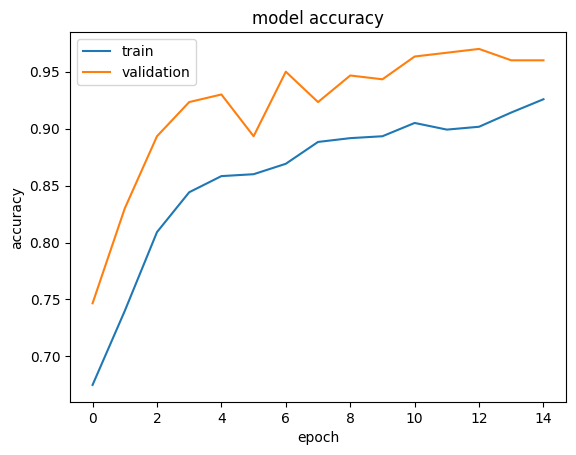

In [33]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [34]:
# Cell 9: Unfreeze model and continue training
for layer in model.layers[-20:]:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True

optimizer = keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

epochs = 5
hist = model.fit(train_ds, epochs=epochs, validation_data=val_ds)


Epoch 1/5
75/75 [==============================] - 143s 1s/step - loss: 0.5285 - accuracy: 0.9083 - val_loss: 0.3302 - val_accuracy: 0.9867
Epoch 2/5
75/75 [==============================] - 126s 2s/step - loss: 0.4747 - accuracy: 0.9233 - val_loss: 0.3575 - val_accuracy: 0.9700
Epoch 3/5
75/75 [==============================] - 105s 1s/step - loss: 0.4735 - accuracy: 0.9308 - val_loss: 0.3139 - val_accuracy: 0.9867
Epoch 4/5
75/75 [==============================] - 126s 2s/step - loss: 0.4550 - accuracy: 0.9308 - val_loss: 0.3179 - val_accuracy: 0.9800
Epoch 5/5
75/75 [==============================] - 105s 1s/step - loss: 0.4314 - accuracy: 0.9392 - val_loss: 0.3108 - val_accuracy: 0.9767


In [35]:
# Cell 10: Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/EV2L_v2.h5')


(1.0, 5.0)

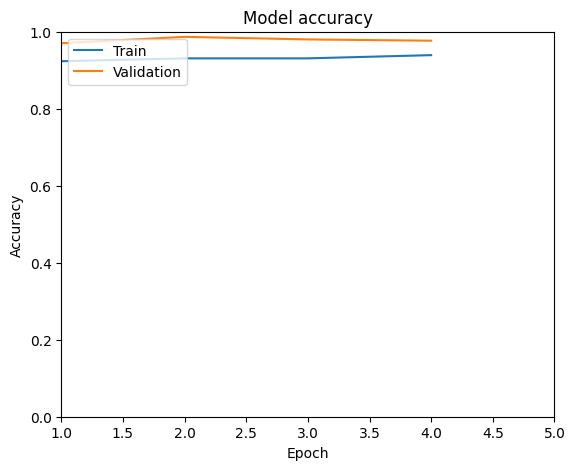

In [36]:
# Cell 11: Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim([0, 1])  # Set the y-axis scale from 0 to 1
plt.xlim([1, epochs])  # Set the x-axis scale from 1 to number of epochs


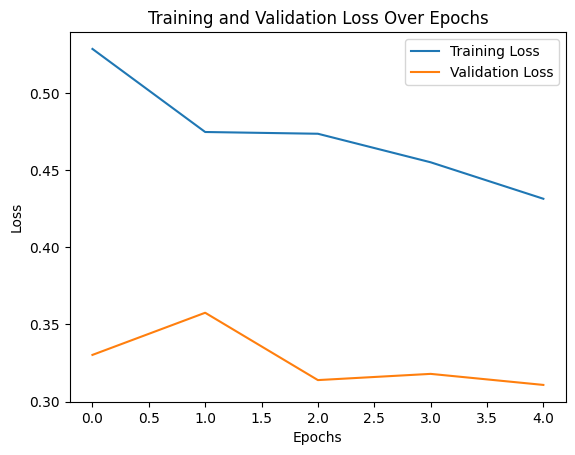

In [43]:

plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
